In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
%matplotlib inline

class LogReg():
    def sigmoid(self,x): return 1/(1+np.exp(-x))
    def __init__(self, batch_size=25, num_steps=350, lr=1e-2, features=2,lambda_=0.1,regularization="None"):
        self.features=features
        self.weights=np.random.rand(features)
        self.bias=0
        self.regularization=regularization
        self.lambda_=lambda_
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr

    def compute_cost(self,y,y_hat):
        term1=np.sum(np.multiply(y,np.log(1-y_hat)))
        term2=np.sum(np.multiply(1-y,np.log(y_hat)))
        reg=0
        if(self.regularization=="L2"):
            reg=self.lambda_*sum((self.weights**2))
        return -(term1+term2)/len(y)-reg
    def fit(self,x,y,print_each=100):

        n=x.shape[0]
        for epoch in range(self.num_steps):

            # sample_indices = np.random.randint(0, n_objects, size=self.batch_size)
            y_hat = np.dot(x,self.weights)+self.bias
            y_hat = self.sigmoid(y_hat)
            diff = y-y_hat
            grad_w = np.dot(x.T,diff)*self.lr/n
            if(self.regularization=="L2"):
                grad_w += self.lambda_*self.weights*2
            self.weights -= grad_w
            grad_b = np.sum(diff)*self.lr/n
            self.bias -= grad_b
            if((epoch+1)%print_each==0):
                print("epoch {} -------> loss={}".format((epoch+1),self.compute_cost(y,y_hat)))

        return self

    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred>0.5,1,0)
        diff=np.abs(y-pred)
        return(sum(diff)/len(diff))

    def predict(self,x):
        return self.sigmoid(np.dot(x,self.weights)+self.bias)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


epoch 100 -------> loss=0.5919342863529399
epoch 200 -------> loss=0.5628822338117073
epoch 300 -------> loss=0.5578091600267046
accuracy = 0.97


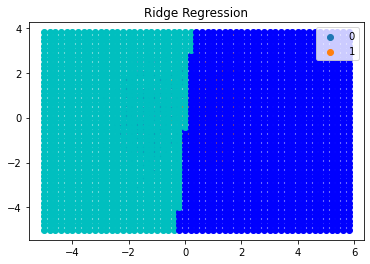

In [49]:
def visualize(model,title):
    print("accuracy = {}".format(model.evaluate(x_test,y_test)))
    x1=np.arange(-5,6,0.2)
    x2=np.arange(-5,4,0.2)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred=model.predict([np.array(np.array([x1[i],x2[j]]))])[0]
            if(pred>0.5):
                plt.scatter(x1[i],x2[j],c="c")
            else:
                plt.scatter(x1[i],x2[j],c="b")
    plt.title(title)
    plt.show()

# Generating and visualizing data 
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1))

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

model1=LogReg(regularization="L2",lambda_=0.01)
model1.fit(x,y)
visualize(model1,"Ridge Regression")

In [50]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 2
n_objects = 1000

w_true = np.random.uniform(-2, 2, (n_features, 1))

# X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
# Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))

X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [57]:
own_model = LogReg(regularization="L2",lambda_=0.01).fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)
print(y_pred)
sklearn_model = Ridge(alpha=0.01).fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)
print(y_pred)

sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn loss:', sklearn_r2)

epoch 100 -------> loss=0.610938345220289
epoch 200 -------> loss=0.5943563806989165
epoch 300 -------> loss=0.5916715919186537
[0.58284996 0.58427837 0.51276134 0.44035161 0.58435415 0.54557807
 0.56097768 0.55256172 0.4770361  0.46747397 0.48381829 0.52902883
 0.42619427 0.48695355 0.42018203 0.41744804 0.44088248 0.43119468
 0.42571922 0.50272541 0.43079312 0.4478592  0.59901316 0.57879947
 0.57279067 0.46053703 0.46093158 0.53998576 0.57112364 0.61398291
 0.60522266 0.45480159 0.41137367 0.4438612  0.57145229 0.47967422
 0.5660782  0.57031741 0.57191546 0.52698973 0.55731367 0.57018536
 0.54389768 0.48408253 0.42287463 0.47324556 0.45847071 0.45542829
 0.46101589 0.41589371 0.50261031 0.45688737 0.53467437 0.47656804
 0.5644473  0.40785035 0.44316382 0.53913459 0.50030383 0.43774967
 0.40743497 0.47701974 0.49431493 0.45209274 0.61140846 0.5586172
 0.56998579 0.45890888 0.53685053 0.48909837 0.46290073 0.43333167
 0.59198893 0.56582434 0.57452093 0.55805303 0.49034463 0.51799566
 0